# Imports


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

from itertools import chain, combinations

from sklearn.linear_model  import LogisticRegression
from sklearn.feature_selection import RFECV, SelectKBest

from sklearn import tree

# Aula 03/20 - Pandas


In [ ]:
#Loading base of datas
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/kobe_shots.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [ ]:
#get number row and cows -> shape
n_rows,n_cows = df.shape
print(n_rows)
print(n_cows)

30697
25


In [ ]:
#show the beging  of dataset
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [ ]:
#show the end of dataset 
df.tail(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [ ]:
# select cow action_type
df['action_type']

0                Jump Shot
1                Jump Shot
2                Jump Shot
3                Jump Shot
4        Driving Dunk Shot
               ...        
30692            Jump Shot
30693             Tip Shot
30694    Running Jump Shot
30695            Jump Shot
30696            Jump Shot
Name: action_type, Length: 30697, dtype: object

In [ ]:
#select action_type and period
df[['action_type','period']]

,action_type,period
0,Jump Shot,1
1,Jump Shot,1
2,Jump Shot,1
3,Jump Shot,1
4,Driving Dunk Shot,2
...,...,...
30692,Jump Shot,4
30693,Tip Shot,4
30694,Running Jump Shot,4
30695,Jump Shot,4


In [ ]:
# describe -> static of number columns
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [ ]:
#select lines
#afeter line 10 at 12
df[10:12]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,0,2000-01,56,25,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,0,2000-01,0,17,1.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


In [ ]:
## Commands 
# loc:
# select  instance  by index
# iloc:
# select instance  by position
# ix (deprect):
# both

print(df.loc[0])
print("\n\n")
print(df.iloc[0])  

action_type                    Jump Shot
combined_shot_type             Jump Shot
game_event_id                         10
game_id                         20000012
lat                              33.9723
loc_x                                167
loc_y                                 72
lon                             -118.103
minutes_remaining                     10
period                                 1
playoffs                               0
season                           2000-01
seconds_remaining                     27
shot_distance                         18
shot_made_flag                       NaN
shot_type                 2PT Field Goal
shot_zone_area             Right Side(R)
shot_zone_basic                Mid-Range
shot_zone_range                16-24 ft.
team_id                       1610612747
team_name             Los Angeles Lakers
game_date                     2000-10-31
matchup                        LAL @ POR
opponent                             POR
shot_id         

In [ ]:
#erase first line
#axis = 0 line
#axis = 1 clow
#this command make a view of table if the inplace is False or Null
df.drop(0, axis=0, inplace=True)

In [ ]:
df.loc[0]

KeyError: ignored

In [ ]:
df.iloc[0]

In [ ]:
#creat new index from 0
df.reset_index()

In [ ]:
#possibles values of shot_type
print(str(df['shot_type'].unique()) + "\n")
#Count of values of shot_type
print(str(df['shot_type'].nunique()) + "\n")
#Count line by of type
print(df['shot_type'].value_counts())


In [ ]:
#Count lines of shot_type by filters
#Select of instances by value of shot_type iqual 2PT
#Select of instances by value of shot_type iqual 3PT
#Count both
df_2pt = df[df['shot_type'] == '2PT Field Goal']
df_3pt = df[df['shot_type'] == '3PT Field Goal']
print(len(df_2pt))
print("\n")
print(len(df_3pt))



In [ ]:
#Count lines the pich hit in 2pt
#& = AND 
#| = OR
#~ = NOT
mask = (df['shot_type'] == '2PT Field Goal') & (df['shot_made_flag'] == 1.0)
len(df[mask])


In [ ]:
#max, min, mean, std, var
print(df['minutes_remaining'].max())
print(df['minutes_remaining'].min())
print(df['minutes_remaining'].mean())
print(df['minutes_remaining'].std())
print(df['minutes_remaining'].var())


In [ ]:
#median
np.median(df['minutes_remaining'])

In [ ]:
#mode
df.mode()['minutes_remaining'][0]

In [ ]:
#ording by period
df.sort_values('period', ascending=False).head(2)

In [ ]:
#creat a cloumn
df['game_event_id_sum'] =  df['game_event_id'] +50

In [ ]:
#Apply function  in column
def is_home_game(x):
  if x.find('@') < 0:
    return  1
  else:
    return 0

df['home_game'] = df['matchup'].apply(is_home_game)
df.head(1)

In [ ]:
#Using lambda 
df['home_game_lambda'] = df['matchup'].apply(lambda x: 1 if (x.find('@') < 0) else 0)
df.head(1)

In [ ]:
#Home Work
def point_made(data):    
    if data[0] == 1.0:
      if data[1] == '2PT Field Goal':
        return 2
      else:
        return 3
    return 0
df['points_made'] = df[['shot_made_flag','shot_type']].apply(point_made,axis=1)

df

# Aula 10/08 - Estatística descritiva de dados


In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/Salaries.csv')

In [ ]:
df

In [ ]:
df.drop('Unnamed: 0',axis= 1, inplace=True)

In [ ]:
df.head(5)

In [ ]:
df['rank'].unique()

In [ ]:
df['sex'].unique()

In [ ]:
## Calculando maior Salario, menor salario e salario medio por rank
df.groupby('rank')['salary'].mean()

In [ ]:
df.groupby('rank')['salary'].min()

In [ ]:
df.groupby('rank')['salary'].max()

In [ ]:
df.groupby('rank')['salary'].describe()

In [ ]:
df[df['rank']== 'Prof']['salary'].hist(bins=25) #histograma

In [ ]:
df['salary'].hist(bins=25)

In [ ]:
### Qual o comportamento dos salarios entre os sexos?
df.groupby('sex')['salary'].describe()

In [ ]:
### Qual o comportamento do salario perante sexo e rank?
df.groupby(['sex','rank'])['salary'].describe()

In [ ]:
df.corr()

# Aula 17/08 - Análise univariada e multivariada de dados

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')
df.head(5)

In [ ]:
df.info()

In [ ]:
df['Age'].unique()

In [ ]:
#histograma
df['Age'].hist()

In [ ]:
#histograma(seaborn) -> distplot(KDE -> probabilidade)
sns.distplot(df['Age'], kde=False, bins=10)
plt.show()

In [ ]:
#grafico de barras(normalmente nao faz sentido para variaveis numericas)
sns.countplot(df['Age'])
plt.show()

In [ ]:
#box-plot
sns.boxplot(df['Age'])
plt.show()
#whiskersÇ representam minimos e maximos "aceitaveis" (Método de Tukey)
#aula voltada para outliers

In [ ]:
df['Age'].describe()

In [ ]:
#violin plot
sns.violinplot(df['Age'])
plt.show()

In [ ]:
# grafico de barra
sns.countplot(df['Embarked'])
plt.show()

In [ ]:
#pie chart
df['Embarked'].dropna().value_counts().plot(kind='pie')

In [ ]:
df['Embarked'].value_counts()df['Embarked'].value_counts()

In [ ]:
# comparando as distribuicoes de idade por sobrevivencia ou nao
sns.boxplot(x = df['Survived'], y = df['Age'])
plt.show()

In [ ]:
#comparando as distribuicoes de idades por sexo 
sns.boxplot(x = df['Sex'], y = df['Age'])
plt.show()

In [ ]:
# Criar a base
df = pd.DataFrame({
    'x' : np.random.normal(10, 1.2, 20000),
    'y' : np.random.normal(10, 1.2, 20000),
    'group' : np.repeat('A', 20000)
})

tmp1 = pd.DataFrame({
    'x' : np.random.normal(14.5, 1.2, 20000),
    'y' : np.random.normal(14.5, 1.2, 20000),
    'group' : np.repeat('B', 20000)
})

tmp2 = pd.DataFrame({
    'x' : np.random.normal(9.5, 1.5, 20000),
    'y' : np.random.normal(15.5, 1.5, 20000),
    'group' : np.repeat('C', 20000)
})

# concatenating the data
df = df.append(tmp1).append(tmp2)


In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
#analisando cada variavel de forma individual
sns.distplot(df['x'])
plt.show()

In [ ]:
#analisando cada variavel de forma individual
sns.distplot(df['y'])
plt.show()

In [ ]:
#overploting
sns.scatterplot(df['x'],df['y'])
plt.show()

In [ ]:
#mudar tamanho das bolinhas
sns.scatterplot(df['x'],df['y'], s=2)
plt.show()

In [ ]:
#transparencia
sns.scatterplot(df['x'],df['y'], alpha=0.01)
plt.show()

In [ ]:
#densidade
sns.kdeplot(df['x'],df['y'], shade=True)
plt.show()

In [ ]:
#join plot
sns.jointplot(df['x'],df['y'],kind='kde')
plt.show()

In [ ]:
#amostragem (sampling)
samp = df.sample(1000)
sns.scatterplot(samp['x'], samp['y'])
plt.show()

In [ ]:
#enfase -> dar mais atencao a umm dos grupos
df_a = df[df['group']=='A']
df_restante = df[df['group']!='A']

sns.scatterplot(df_restante['x'],df_restante['y'], color='grey')
sns.scatterplot(df_a['x'],df_a['y'],color='green')
plt.show()

In [ ]:
#facet grids -> facetamento
#analisar o comportamento de x e y, por grupo
g = sns.FacetGrid(df, col='group', hue='group')
g = g.map(plt.scatter,'x','y')
plt.show()

In [ ]:
# Criando nova base de dados
a = np.concatenate([
                    np.random.normal(2, 4, 1000),
                    np.random.normal(4, 4, 1000),
                    np.random.normal(1, 2,  500),
                    np.random.normal(10, 2, 500),
                    np.random.normal(8, 4, 1000),
                    np.random.normal(10, 4, 1000)
])

df = pd.DataFrame({
    'x': np.repeat(range(1,6), 1000),
    'y': a
})


In [ ]:
df.head(5)

In [ ]:
#scannerplot
sns.scatterplot(df['x'],df['y'])
plt.show()

In [ ]:
#stripplot
sns.stripplot(df['x'], df['y'], jitter=0.3, size=2)
plt.show()

In [ ]:
#combinando boxplots com stripplots
sns.boxplot(df['x'], df['y'])
sns.stripplot(df['x'], df['y'], jitter=0.3, size=2, color='grey')
plt.show()

In [ ]:
#combinando violin com stripplots
sns.violinplot(df['x'], df['y'])
sns.stripplot(df['x'], df['y'], jitter=0.3, size=2, color='grey')
plt.show()

In [ ]:
#combinando swarm plots
sns.swarmplot(df['x'], df['y'])
plt.show()

# Aula 24/08 - Análise de correlações

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/meses_producao_custo.csv')

In [ ]:
df

In [ ]:
df.corr(method = 'pearson')

In [ ]:
sns.scatterplot(df['litros'], df['custo'])
plt.show()

In [ ]:
sns.regplot(df['litros'], df['custo'])
plt.show()

In [ ]:
# Exemplo onde a correlação não funciona
x = np.linspace(-np.pi, 5*np.pi, 201) # Criando 200 pontos que variam de -pi a pi
y = np.sin(x)
g = sns.jointplot(x=x, y=y, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

In [ ]:
df.corr(method = 'spearman') # Valores muito próximos a pearson

In [ ]:
# Relação entre variáveis categóricas
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [ ]:
df.head()

In [ ]:
# existe relação entre sexo e porto de embarque?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='columns' )
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

In [ ]:
# existe relação entre o porto de embarque para cada um dos sexos?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='index' )
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

In [ ]:
# Relação entre Pclass e Porto
ctab = pd.crosstab(df['Pclass'], df['Embarked'], normalize = 'columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

In [ ]:
df['Pclass'].value_counts()

In [ ]:
df['Pclass'].isna().sum()

In [ ]:
# Há relação entre sexo e sobrevivência?
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

In [ ]:
# Como podemos visualizar se dentre os homens, os que mais sobreviveram eram crianças?
# sugestão: criar coluna nova(criança = sim/não)

df_crianca = df[(df['Sex']=='male')]
ctab = pd.crosstab(df_crianca['Survived']==1, df_crianca['Age']<=13,  normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

## Multicolinearidade

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/ommlbd_familiar.csv',na_values=-9999)

In [ ]:
df.head(2)

In [ ]:
df.corr()

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 10

cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.0%')
plt.show()

## VIF
- Se o VIF = 1, significa que a variável não possui correlação com as demais
- Se o VIF > 5, então há uma correlação com várias outras variáveis

DETALHE: O VIF só é calculado se não houverem valores faltantes

Redes neurais, arvores de decisão, regressão logística -> NÃO se beneficiam de poucas variáveis correlacionadas entre si

Ensembles -> random forest, xgboost: se beneficiam de variáveis correlacionadas

(componente aleatoria -> ignoram correlações altas entre atributos).

In [ ]:
# Imputação

# -> Substituir os valores faltantes pela média de cada coluna
df.fillna(df.mean(), inplace=True)

In [ ]:
# Função para cálculo do VIF

def calc_vif(tabela):
    vif = pd.DataFrame()
    vif['variaveis'] = tabela.columns
    vif['vif'] = [variance_inflation_factor(tabela.values, i) for i in range(tabela.shape[1])]
    return vif

In [ ]:
calc_vif(df)

# Regressão logística
# VIF -> n impacta  o resultado  da regressão logística 
# Mas, ao mesmo tempo, remover as variáveis com VIF alto, torna a equação mais simples 

In [ ]:
# Remoção da coluna com maior VIF
df.drop('MEDIAIDADECASA', axis=1, inplace=True)

In [ ]:
calc_vif(df)

# Aula 31/08 - Anotações de aula



### I have a dataset and I need to present it to someone else
  How can I do so, effectively?
  
  

- Usar cores apropriadas, que facilitem o entendimento
- Seguir o checklist proposto
- Escolher um gráfico adequado
- Não deixar o valor total passar de 100%
- Usar a escala correta

### Analysis


- Utilizar cores apenas para colocar ênfase, mas normalmente evitar
- Cuidar com a perspectiva utilizada
- Cuidar com formatos ruins ao fazer o gráfico
- Não colocar muitos dados, e colocar dados que fazem sentido
- Cuidar com a quantidade de informações no gráfico (excesso delas)
- Não sobrepor gráficos
- Cuidar com significado
- Cuidar com o contexto
- Cuidar com o formato dos gráficos
- Cuidar com os que os eixos possuam algum sentido
- Ver se a escala possui datas consistentes e se tem quantidade


### Gestalt principles 

- Proximity: demostra quais objetos próximos pertencem ao mesmo grupo
- Similarity: objetos pertencentes ao mesmo grupo com mesma cor, tamanho,      formato, orientação 
- Enclosure: objetos em estado "enclosed" pertencentes ao mesmo grupo
- Closure: tendemos a perceber objetos como um todo, mesmo quando algumas partes estão faltando
- Continuity: caminho mais "natural" e "refinado" entre objetos que nossos olhos procuram, mesmo podendo não existir
- Connection: tendemos a perceber objetos conectados como um grupo, sendo que a proximidade tende ser mais forte do que a cor, formato ou tamanho

### Which visual components would you change in the following visualization?

- Utilizar números inteiros, retirando o índice após o ponto
- Mudar a cor das linhas de referência atrás das barras para não juntar cores
- Colocar apenas os meses sem o dia, pois é o mesmo dia de todo mês


### Colors

- Utilizar cores que não apresentem problemas de visualização para daltônicos
- Utilizar níveis de cinza, ou seja, escurecimento da cor
- Evitar cores muito intensas, uma vez que elas podem atrapalhar a visuaização

# Aula 21/09 - Análise de outliers




In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/enron.csv')
df.head(5)

In [ ]:
outliers_global = []

for col in df.select_dtypes(include='number').columns.values:

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  upp = q3 + 1.5 * iqr
  low = q1 - 1.5 * iqr

  ix_outliers_col = list( df[(df[col]> upp)| (df[col]< low)].index)
  outliers_global.extend(ix_outliers_col)

In [ ]:
from collections import Counter
for ix,contagem in Counter(outliers_global).most_common(10):
    print(f"{ix} \t {contagem} \t {df.loc[ix]['name']}" )


In [ ]:
from sklearn.ensemble import IsolationForest

df_num = df.select_dtypes(include='number')
df_num.fillna(df.mean(), inplace=True)

isof = IsolationForest(random_state=101)
isof.fit(df_num)

# Aula 28/09


In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/california_housing_train.csv')

In [ ]:
df

In [ ]:
sns.distplot(df['total_bedrooms'],kde=False)

In [ ]:
ss = StandardScaler()
df['total_bedrooms_ss'] = ss.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))


In [ ]:
mm = MinMaxScaler()
df['total_bedrooms_mm'] = mm.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

In [ ]:
rs = RobustScaler()
df['total_bedrooms_rs'] = rs.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

In [ ]:
sns.distplot(df['total_bedrooms_rs'],kde=False)

In [ ]:
bc = PowerTransformer(method='box-cox')
df['total_bedrooms_bc'] = bc.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

In [ ]:
sns.distplot(df['total_bedrooms_bc'],kde=False)

In [ ]:
bc.inverse_transform(np.array(df['total_bedrooms_bc']).reshape(-1,1))

In [ ]:
mm_tudo = MinMaxScaler(feature_range=(0.00001,1.0))
dados = mm_tudo.fit_transform(df)

bc_tudo = PowerTransformer(method='box-cox')
dados = bc_tudo.fit_transform(dados)
dados

In [ ]:
inv_bc_tudo = bc_tudo.inverse_transform(dados)
inv_mm_tudo = mm_tudo.inverse_transform(inv_bc_tudo)

In [ ]:
df_invertido = pd.DataFrame(data=inv_mm_tudo, columns=df.columns.values)

In [ ]:
df_invertido

In [ ]:
df_treino = df[:10000]
df_teste = df[10001:]

In [ ]:
mm = MinMaxScaler(feature_range=(0.00001,1.0))
bc = PowerTransformer(method='box-cox')

mm.fit(df_treino)
df_treino_mm = mm.transform(df_treino)

bc.fit(df_treino_mm)
df_treino_mm_bc = bc.transform(df_treino_mm)


In [ ]:
df_teste_mm = mm.transform(df_teste)
df_teste_mm = pd.DataFrame(data=df_teste_mm, columns=df.columns.values)
df_teste_mm[df_teste_mm <= 0] = 0.0001
df_teste_mm_bc = mm.transform(df_teste_mm)

In [ ]:
df_titanic = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')


In [ ]:
df_titanic

In [ ]:
df_titanic.isnull().sum()

In [ ]:
df_titanic.isnull().sum(axis=1)

In [ ]:
media = df_titanic['Age'].mean()
df_titanic['Age_media'] = df_titanic['Age'].fillna(media)

df_titanic['Age_media'].describe()

# Aula 05/10



In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/iris.csv')

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
TARGET_COL = 'variety'
colunas = list(df.columns.values)
colunas.remove(TARGET_COL)

In [ ]:
def powerset(l):
  return chain.from_iterable(combinations(l,r) for r in range(1, len(l)+1))

In [ ]:
combinacoes = list(powerset(colunas))

In [ ]:
for comb in combinacoes:
  #gerando lista com as features selecionadas
  colunas_selecionadas = list(comb)

  #conjuntos X e y
  X, y = df[colunas_selecionadas],df[TARGET_COL]

  #leave=one-out
  loo = LeaveOneOut()
  #listas para armazenar txs de acerto
  accs_dt = []
  accs_nn = []
  for train_index, test_index in loo.split(X):
    # definido conjuntos de treino e teste
    X_train , Y_train = X.loc[train_index], y.loc[train_index]
    X_test, Y_test = X.loc[test_index], y.loc[test_index]

    #treinamento dos classificadores
    nn = KNeighborsClassifier(1,algorithm='brute')
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split= 2, min_impurity_decrease= 0.25)

    nn.fit(X_train,Y_train)
    dt.fit(X_train,Y_train)

    #teste dos classificadores no cjto de teste
    y_pred_nn = nn.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    #armazenar a tx de acerto nas listas
    accs_dt.append(accuracy_score(Y_test, y_pred_dt))
    accs_nn.append(accuracy_score(Y_test, y_pred_nn))

  #acabando leave_one_out, vamos apresentar a tx de acerto media por combinacao
  print('-' * 30)
  print(f'FEATURES USADAS = {colunas_selecionadas}')
  print(f'\t DT: {100.0 * sum(accs_dt)/len(accs_dt)}%')
  print(f'\t NN: {100.0 * sum(accs_nn)/len(accs_nn)}%')

------------------------------
FEATURES USADAS = ['sepal.length']
	 DT: 62.666666666666664%
	 NN: 58.666666666666664%
------------------------------
FEATURES USADAS = ['sepal.width']
	 DT: 52.666666666666664%
	 NN: 48.0%
------------------------------
FEATURES USADAS = ['petal.length']
	 DT: 94.0%
	 NN: 88.0%
------------------------------
FEATURES USADAS = ['petal.width']
	 DT: 95.33333333333333%
	 NN: 88.0%
------------------------------
FEATURES USADAS = ['sepal.length', 'sepal.width']
	 DT: 62.666666666666664%
	 NN: 70.0%
------------------------------
FEATURES USADAS = ['sepal.length', 'petal.length']
	 DT: 94.0%
	 NN: 91.33333333333333%
------------------------------
FEATURES USADAS = ['sepal.length', 'petal.width']
	 DT: 95.33333333333333%
	 NN: 92.66666666666667%
------------------------------
FEATURES USADAS = ['sepal.width', 'petal.length']
	 DT: 94.0%
	 NN: 92.0%
------------------------------
FEATURES USADAS = ['sepal.width', 'petal.width']
	 DT: 95.33333333333333%
	 NN: 92

### Wrapper RFE

In [ ]:
X, y = df[colunas], df[TARGET_COL]


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
lr = LogisticRegression(max_iter=1000)

In [ ]:
loo = LeaveOneOut()

In [ ]:
rfe_dt = RFECV(estimator=dt, cv=loo, scoring='accuracy')
rfe_lr = RFECV(estimator=lr, cv=loo, scoring='accuracy')

In [ ]:
rfe_dt.fit(X,y)
rfe_lr.fit(X,y)

RFECV(cv=LeaveOneOut(),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=1000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('---DT----')
print('\t Suporte: ')
print(rfe_dt.support_)
print('\t Ranking: ')
print(rfe_dt.ranking_)

---DT----
	 Suporte: 
[ True False  True  True]
	 Ranking: 
[1 2 1 1]


In [ ]:
print('---LR----')
print('\t Suporte: ')
print(rfe_lr.support_)
print('\t Ranking: ')
print(rfe_lr.ranking_)

---LR----
	 Suporte: 
[False  True  True  True]
	 Ranking: 
[2 1 1 1]


### SelectKBest

In [ ]:
skb = SelectKBest(k='all')
skb.fit(X,y)


SelectKBest(k='all', score_func=<function f_classif at 0x7f568ddce510>)

In [ ]:
importances = skb.scores_

In [ ]:
importances

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [ ]:
importances = pd.Series(data= importances, index=X.columns.values)

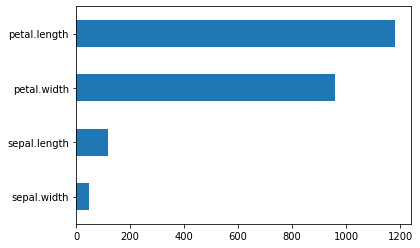

In [ ]:
importances.sort_values().plot(kind='barh')

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dt.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [ ]:
impotances =  dt.feature_importances_
importances = pd.Series(data=importances, index=X.columns.values)

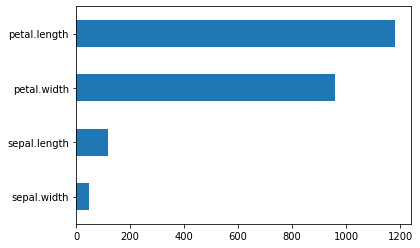

In [ ]:
importances.sort_values().plot(kind='barh')

[Text(464.99999999999994, 830.5, 'petal.length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(393.46153846153845, 679.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(536.5384615384615, 679.5, 'petal.width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(286.15384615384613, 528.5, 'petal.length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(143.07692307692307, 377.5, 'petal.width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(71.53846153846153, 226.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(214.61538461538458, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(429.23076923076917, 377.5, 'petal.width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(357.6923076923077, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\ncla

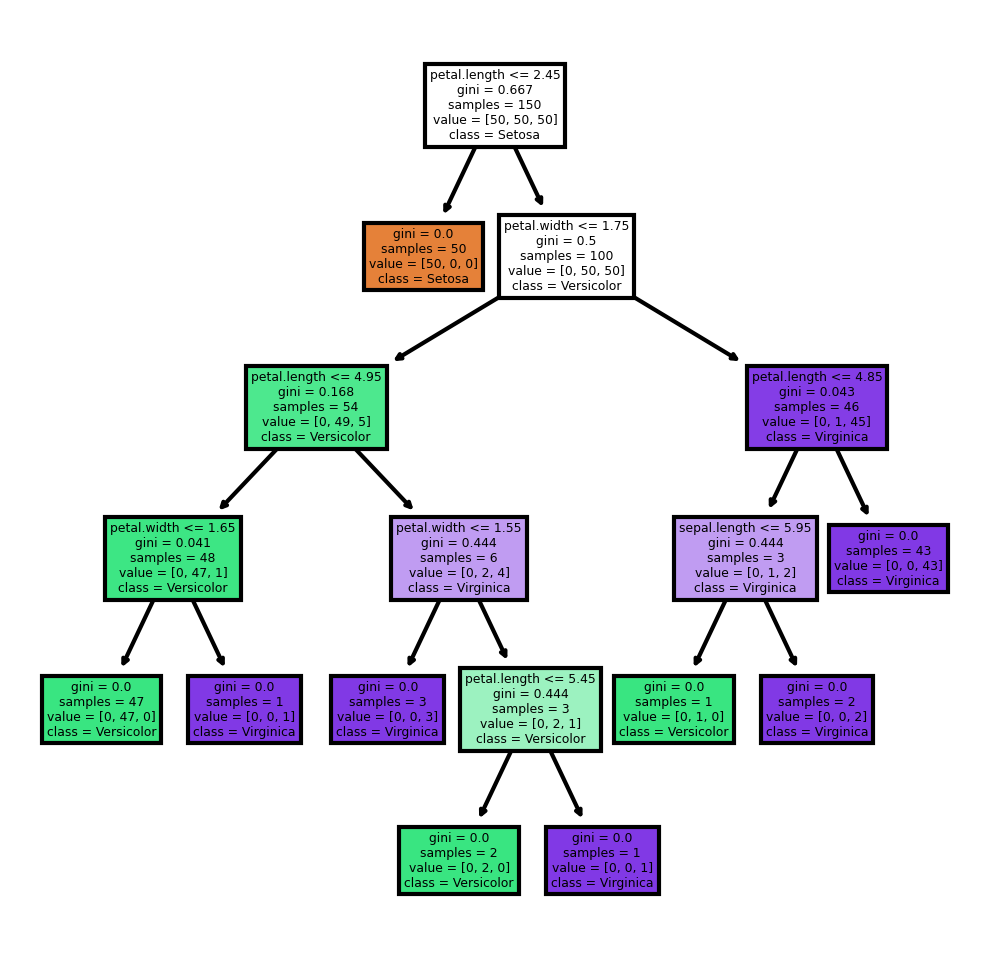

In [ ]:
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dt, feature_names=X.columns.values,class_names=y.unique(), filled=True)